In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Data Preparation

Import the “House Prices in Boston” dataset from Scikit-Learn

In [2]:
from sklearn.datasets import load_boston
# Load the "House Prices in Boston" dataset
boston_dataset = load_boston()

In [3]:
# First, we see the a list of all the keys in the dictionary
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
# Now, we see the dataset description
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Based on the description, the data set contains 506 raw data and 13 features (columns), with the target label: MEDV (median value of owner-occupied homes in $ 1000 or average house price). This data also contains no missing values**

In [5]:
# Let's show the data features into dataframe
boston_df = pd.DataFrame(boston_dataset['data'], columns = boston_dataset['feature_names'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Now we add the target label into boston_df
# We change the target column to "PRICE" column for better understanding
boston_df['PRICE'] = boston_dataset['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# Summary of the dataframe
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
# Statistics
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Data Visualization

Text(0, 0.5, 'Number of Houses')

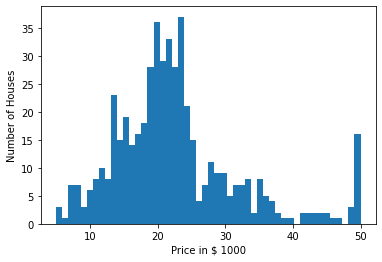

In [9]:
# Histogram of Prices
plt.hist(boston_df.PRICE, bins=50)
plt.xlabel('Price in $ 1000')
plt.ylabel('Number of Houses')

**Based on the histogram, it can be seen that the average of Price lies in the range of 20,000- $ 25,000**

Now we will examine the co relation of the features

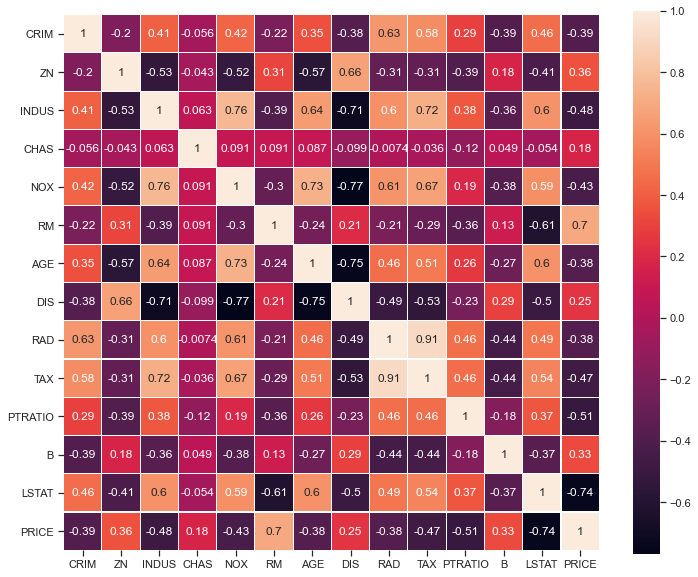

In [10]:
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(12, 10))
sns.heatmap(boston_df.astype(float).corr(), linewidths=0.1, square=True, linecolor='white', annot=True)
plt.show()

**By looking at the correlation matrix we can see that RM (number of rooms in the dwelling /** jumlah kamar tiap hunian) **has a strong positive correlation with "PRICE" (0.7)**

As RM has a strong positive correlation with "PRICE", we want to visualize the distribution of both

Text(0, 0.5, 'Price in $1000')

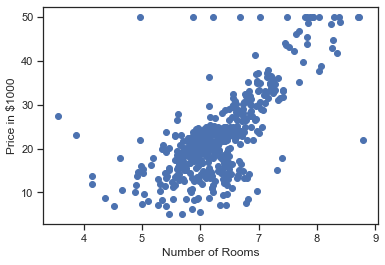

In [11]:
# Plot the column at the 5 index
plt.scatter(boston_dataset.data[:,5], boston_df.PRICE)
plt.xlabel('Number of Rooms')
plt.ylabel('Price in $1000')

**Based on the scatter plot, it can be concluded that house prices will continue to increase along with the increasing number of rooms in the house, this means that there is a positive correlation between the number of rooms and the price of the house**

Next, we display automatically "linear fit", between the RM feature and the PRICE feature

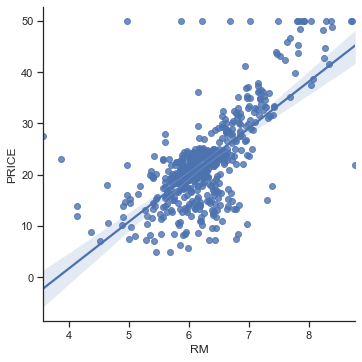

In [12]:
# Create a linear fit
sns.lmplot('RM', 'PRICE', data=boston_df)

**Based on the plot, it can be seen that we can built a simple linear fit model on the dataset that is owned**

# Solve the problem of Univariate Linear Regression

Univariate linear regression focuses on determining relationship between one independent (predictor variable) variable and one dependent (response variable)

In [13]:
# Set up X as median room values
X = boston_df.RM
X.shape

(506,)

In [14]:
# Use vstack to make X two-dimensional
X = np.vstack(boston_df.RM)
X.shape

(506, 1)

In [15]:
# Set up Y as target price of the houses
Y = boston_df.PRICE

Then we will create a matrix A, which is a matrix in the form of [X,1] derived from the array X

In [16]:
# Create the X array in the form [X,1]
X = np.array( [ [value,1] for value in X ])
X = X.astype(float)

In [17]:
X

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

Next, we will use **np.linalg.lstsq** to obtain the best fit values (m, b) of the equation y = mx + b. The steps are as follows:

In [18]:
# Obtain the best m and b values
m,b = np.linalg.lstsq(X, Y, rcond=None)[0]
print(m,b)

9.102108981180315 -34.67062077643858


Now, we plotting the best fit values

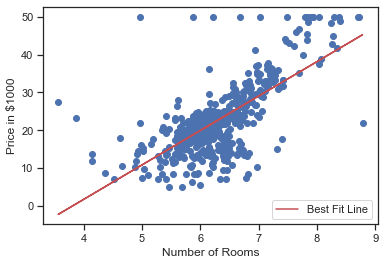

In [19]:
# Plot PRICE against Avg Number of Rooms (RM)
plt.plot(boston_df.RM, boston_df.PRICE, 'o')

# Plot the best fit line
x = boston_df.RM
plt.plot(x, m*x + b, 'r', label='Best Fit Line')
plt.xlabel('Number of Rooms')
plt.ylabel('Price in $1000')
plt.legend()

# Getting the Error (RMSE)

In [20]:
# Get the resulting array
result = np.linalg.lstsq(X,Y,rcond=None)
# Get the total error
error_total = result[1]
# Get the Root Mean Square Error
rmse = np.sqrt(error_total/len(X))
print ('The root mean square error was %.2f' %rmse)

The root mean square error was 6.60


**Because the RMSE calculation process is almost the same as the standard deviation calculation process for a population, it can be concluded that the price of a house will not vary more than 2 times the RMSE (95%).
Thus, it can be estimated that the house price is in the range of $ 13,200.**

# Train/Test Split

In [21]:
# Split the data into predictors X and Y
feature = boston_df.drop('PRICE',1) # Data Columns
prices = boston_df.PRICE # Data Targets

In [22]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, prices, test_size=0.3, random_state=42) # test size 30%
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((354, 13), (354,), (152, 13), (152,))

# Build Linear Regression Model

In [23]:
from sklearn.linear_model import LinearRegression

# Calling the LinearRegression and saving it in object
lin_reg = LinearRegression()

# Inbuilt .fit function is used for the training
lin_reg.fit(X_train, y_train)

# Inbuilt .predict function is used for prediction on training sets
pred_train = lin_reg.predict(X_train)

# Inbuilt .predict function is used for prediction on testing sets
pred_test = lin_reg.predict(X_test)

In [24]:
# Coefficient of intercept
lin_reg.intercept_

31.63108403569297

In [25]:
# Converting the coefficient values to a dataframe
lin_reg_coef = pd.DataFrame([X_train.columns,lin_reg.coef_]).T
lin_reg_coef = lin_reg_coef.rename(columns={0: 'Attribute', 1: 'Coefficients'}) #put into dataframe
lin_reg_coef #print out

,Attribute,Coefficients
0,CRIM,-0.13347
1,ZN,0.0358089
2,INDUS,0.0495226
3,CHAS,3.11984
4,NOX,-15.4171
5,RM,4.0572
6,AGE,-0.0108208
7,DIS,-1.386
8,RAD,0.242727
9,TAX,-0.00870223


**It can be seen that the largest coefficient value is owned by the variable RM = 4.0572, this shows that the number of rooms per dwelling** / hunian **has a high correlation value, on the price of the house (PRICE)**

# Model Evaluation

In [26]:
# Accuracy score 
print('Accuracy for Train data: %.2f' % lin_reg.score(X_train, y_train))
print('Accuracy for Test data: %.2f' % lin_reg.score(X_test, y_test))

Accuracy for Train data: 0.74
Accuracy for Test data: 0.71


In [27]:
# Other evaluation metrics
from sklearn import metrics

# Print R2 score
print('Fit a model X_train and calculate the R2 score with Y_train: %.2f' % metrics.r2_score(y_train, pred_train))
print('Fit a model X_train and calculate the R2 score with X_test and Y_test: %.2f' % metrics.r2_score(y_test, pred_test))

print('-----------------------------------------------------------------------------')

# Print MSE value
print('Fit a model X_train and calculate the MSE with Y_train: %.2f' % metrics.mean_squared_error(y_train, pred_train))
print('Fit a model X_train and calculate the MSE with X_test and Y_test: %.2f' % metrics.mean_squared_error(y_test, pred_test))

Fit a model X_train and calculate the R2 score with Y_train: 0.74
Fit a model X_train and calculate the R2 score with X_test and Y_test: 0.71
-----------------------------------------------------------------------------
Fit a model X_train and calculate the MSE with Y_train: 22.55
Fit a model X_train and calculate the MSE with X_test and Y_test: 21.52


**Based on the MSE output value, it can be seen that the R2 score and MSE value from training and testing is very close**

Now, we visualize the differences between actual prices and predicted values

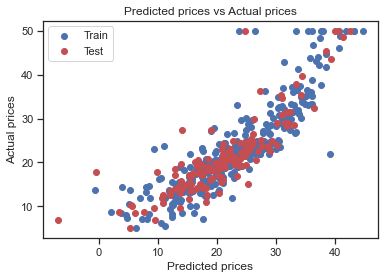

In [28]:
# Scatter plot the training data
train = plt.scatter(pred_train,y_train,c='b',alpha=1)

# Scatter plot the testing data
test = plt.scatter(pred_test,y_test,c='r',alpha=1)

plt.legend((train,test),('Train','Test'),loc='upper left')
plt.xlabel("Predicted prices")
plt.ylabel("Actual prices")
plt.title("Predicted prices vs Actual prices")
plt.show()

## Residual Plots

Residual value is describes the future value of a good in terms of absolute value in monetary terms and it is sometimes abbreviated into a percentage of the initial price when the item was new

The residual plot is a graph that will show the residual value on the vertical axis and the independent variable (PRICE) on the horizontal axis. If the points on the residual plot are randomly distributed around the horizontal axis, it can be concluded that the linear regression model is suitable for the analyzed data

Text(0, 0.5, 'Residuals')

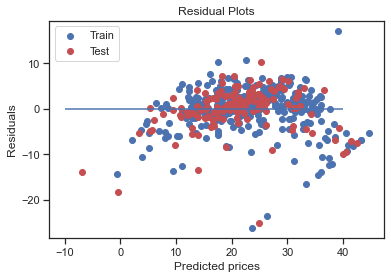

In [29]:
# Scatter plot the training data
train1 = plt.scatter(pred_train,(pred_train-y_train),c='b',alpha=1)

# Scatter plot the testing data
test1 = plt.scatter(pred_test,(pred_test-y_test),c='r',alpha=1)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=40)
plt.legend((train1,test1),('Train','Test'),loc='upper left')
plt.title('Residual Plots')
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')

**Based on the residual plot, it can be seen that the majority of residual points for the train and test set are randomly scattered around the horizontal axis. Based on this, it can be concluded that the linear regression model is suitable for the analyzed data**

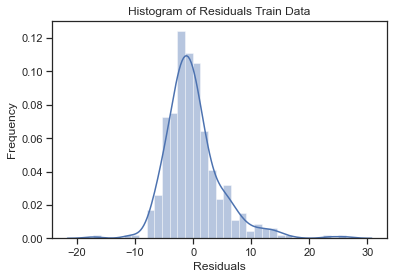

In [30]:
# Checking Normality of errors
sns.distplot(y_train-pred_train, color='b')
plt.title("Histogram of Residuals Train Data")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

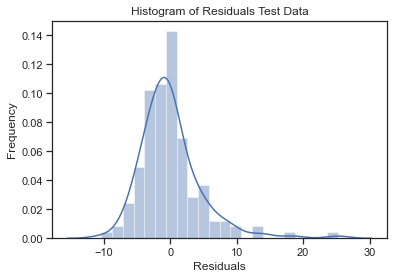

In [31]:
# Checking Normality of errors
sns.distplot(y_test-pred_test, color='b')
plt.title("Histogram of Residuals Test Data")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Make predictions on test dataset

Our Model is ready for prediction with our Test set

In [32]:
pred_test = pred_test.astype(int)
example_submission = pd.DataFrame({
        "Real House Price": y_test,
        "Predicted House Price": pred_test
    })

example_submission.to_csv("PredictedPrice.csv", index=False)
example_submission.head(10)

,Real House Price,Predicted House Price
173,23.6,28
274,32.4,36
491,13.6,15
72,22.8,25
452,16.1,18
76,20.0,23
316,17.8,17
140,14.0,14
471,19.6,23
500,16.8,20
